# CODSOFT TASK THREE

> Name : William Onsare Morara

> Email : williammorara28@gmail.com

# Business problem

The main aim of this project is to develop a machine learning model that can accurately classify Iris flowers into their respective species (setosa, versicolor, and virginica) based on their sepal and petal measurements.     

## Project Objectives  

## Main Objective
* Train a machine learning model to classify Iris flowers into three species based on sepal and petal measurements.

## Specific Objectives:

* Explore and analyze the Iris dataset to gain insights into the characteristics of the data.
* Preprocess the data to make it suitable for training a machine learning model.
* Select an appropriate machine learning algorithm for classification.
* Train and evaluate the model's performance using relevant metrics.


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt 
%matplotlib inline
import seaborn as sns


In [2]:
#Loading dataset

iris_df = pd.read_csv("IRIS.csv")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#checking for the total number of rows and columns

iris_df.shape

(150, 5)

In [4]:
# unique

iris_df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [5]:
#statistical information

iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#information about data

iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#checking value counts of each species

iris_df["species"].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [8]:
#checking for missing values

iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
# check for duplicates

iris_df.duplicated().sum()

3

In [10]:
# Remove duplicate rows

iris_df = iris_df.drop_duplicates()

In [11]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

The dataframes columns are:  

``sepal_length``: Sepal length in centimeters (numerical)  
``sepal_width``: Sepal width in centimeters (numerical)  
``petal_length``: Petal length in centimeters (numerical)    
``petal_width``: Petal width in centimeters (numerical)  
``species``: The target variable, indicating the Iris species (categorical - 'setosa', 'versicolor', 'virginica')  

 ## EDA

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


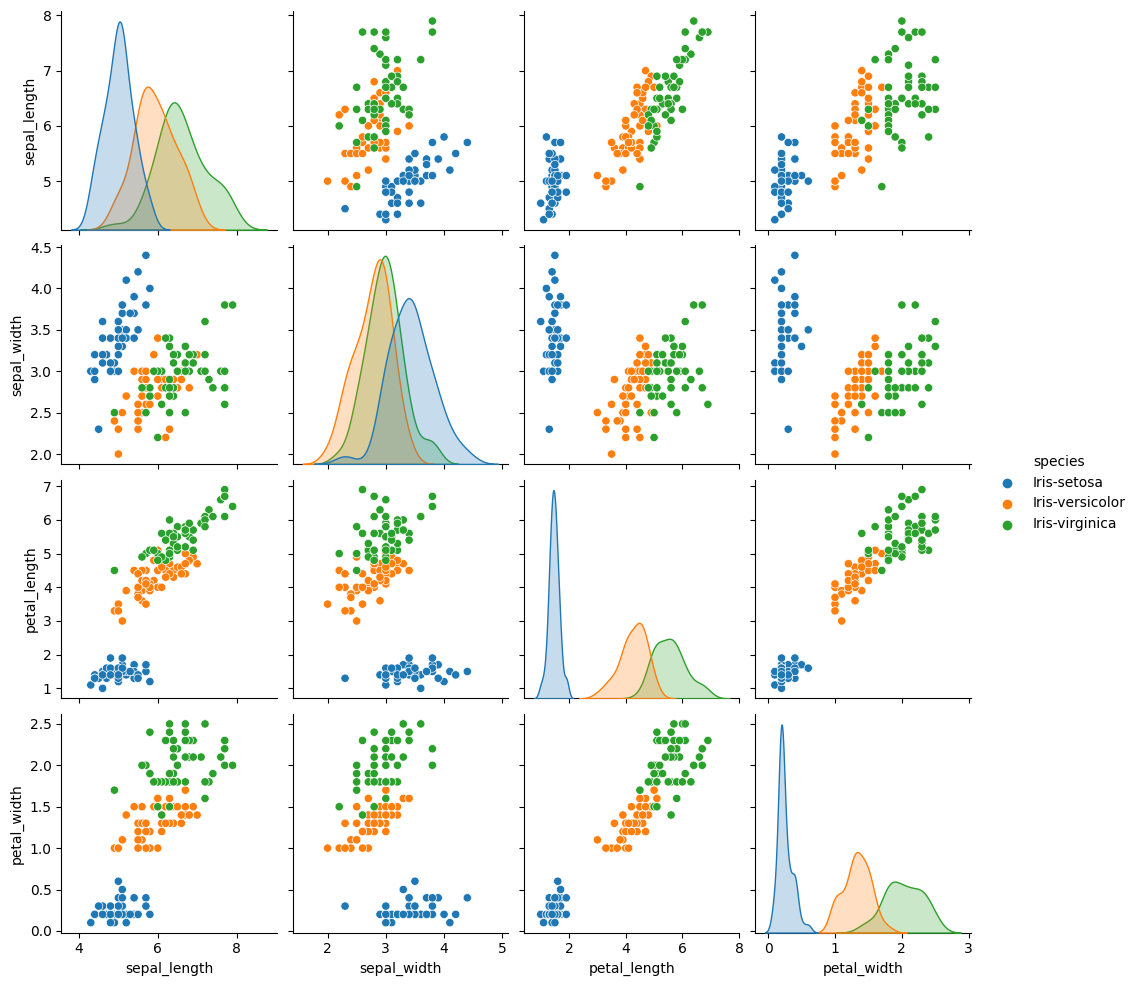

In [12]:
sns.pairplot(iris_df, hue="species");

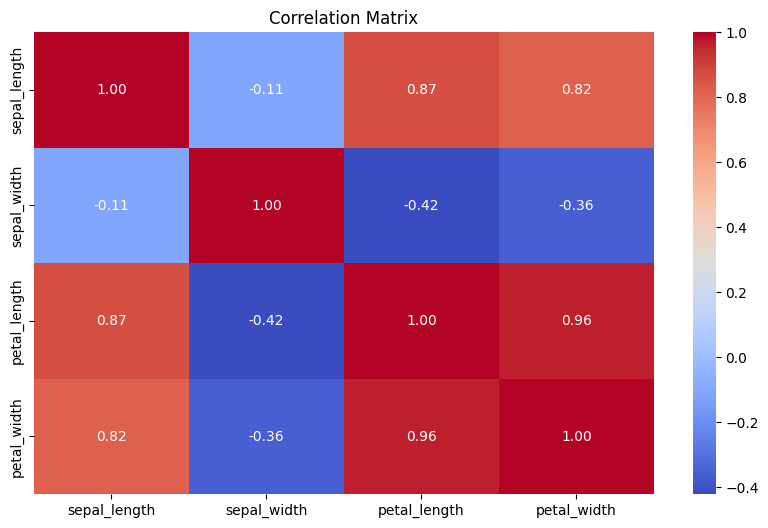

In [13]:
# Select only numeric columns
numeric_columns = iris_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical features
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [14]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



In [15]:
X = iris_df.drop('species', axis=1)
y = iris_df['species']

In [16]:
# scale
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Define the column names based on your original DataFrame
column_names = iris_df.columns[:-1]  # Exclude the 'species' column

# Create a DataFrame from the scaled X
X_scaled = pd.DataFrame(X, columns=column_names)

# Check the first few rows of the scaled data
X_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [17]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [18]:
#split the data into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=2)

## Logistic Regression

In [19]:
# Create a Logistic Regression 
model_logreg = LogisticRegression(max_iter=1000)

# Train on the training data
model_logreg.fit(X_train, y_train)

# Make predictions on both training and test data
y_train_pred = model_logreg.predict(X_train)
y_test_pred = model_logreg.predict(X_test)
# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.93
Test Accuracy: 0.97


In [20]:
# Print classification report and confusion matrix for the test data
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
report = classification_report(y_test, y_test_pred, target_names=class_names)
confusion = confusion_matrix(y_test, y_test_pred)
print("Classification Report (Test Data):\n", report)
print("Confusion Matrix (Test Data):\n", confusion)

Classification Report (Test Data):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        37
      macro avg       0.97      0.97      0.97        37
   weighted avg       0.98      0.97      0.97        37

Confusion Matrix (Test Data):
 [[13  0  0]
 [ 0 11  1]
 [ 0  0 12]]


## KNN

In [21]:
# knn model
model_knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
model_knn.fit(X_train, y_train)

# Make predictions on both training and test data
y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)
# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.95
Test Accuracy: 0.97


In [22]:
# Print classification report and confusion matrix for the test data
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
report = classification_report(y_test, y_test_pred, target_names=class_names)
confusion = confusion_matrix(y_test, y_test_pred)
print("Classification Report (Test Data):\n", report)
print("Confusion Matrix (Test Data):\n", confusion)

Classification Report (Test Data):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        37
      macro avg       0.97      0.97      0.97        37
   weighted avg       0.98      0.97      0.97        37

Confusion Matrix (Test Data):
 [[13  0  0]
 [ 0 12  0]
 [ 0  1 11]]


The knn model is the best model for classification of Iris flowers into their respective species based on sepal and petal measurements. It achieves high accuracy, precision, and recall both on the training and test datasets, demonstrating strong generalization. This model is a reliable and robust choice for the task of Iris flower species identification.